# Eddy Kinetic Energy

This Jupyter notebook reproduces Figure 1 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". Eddy Kinetic Energy is defined as,

\begin{equation}
    \mathrm{EKE}(x,y) = \frac{1}{2}\rho_0\left(u'^2 + v'^2\right)
\end{equation}

Maps of EKE in Figure 1 of this study correspond to the the time-mean EKE:
\begin{equation}
    \overline{EKE}(x,y) = \overline{\frac{1}{2}\rho_0\left(u'^2 + v'^2\right)}
\end{equation}

Then linear trends are computed with a modified Mann-Kendall test (See Methods of manusript).


In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import area, truncate_colormap, ccrs_land, add_patches

In [3]:
dataset_EKE = xr.open_dataset('../datasets/EKE_timeseries.nc')

In [4]:
rho=1025

### Load EKE timeseries dataset:

In [5]:
EKE = dataset_EKE.EKE

In [6]:
print(dataset_EKE)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 9346)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1993-06-01T12:00:00 ... 2019-01-01T12:00:00
Data variables:
    EKE      (time, lat, lon) float32 ...
Attributes:
    title:         Eddy Kinetic Energy
    Description:   Eddy Kinetic Energy computed from AVISO+ altimetry products.
    Publication:   Dataset created for Martínez-Moreno, J. et. al. 2020: \n '...
    Author:        Josué Martínez-Moreno
    Contact:       josue.martinezmoreno@anu.edu.au
    Created date:  08/01/2021 15:41:36


Compute eddy kinetic energy density:

In [7]:
EKE_density = EKE*rho

Slice data between 60°S - 60°N. Note that satellite observations resolve mesoscale eddies between 60°S - 60°N, the effective resolution outside these latitudes is larger than the Rossby radius of deformation.

In [8]:
EKE_domain = EKE_density.sel(lat=slice(-60,60))

Compute time-mean:

In [9]:
mean_EKE = EKE_domain.mean('time')

In [10]:
print(mean_EKE)

<xarray.DataArray 'EKE' (lat: 120, lon: 360)>
array([[0.31153673, 0.28886136, 0.19771357, ..., 0.68070006, 0.64054066,
        0.4183177 ],
       [0.7684755 , 0.46720457, 0.34144232, ..., 3.2651422 , 2.3574858 ,
        1.4945987 ],
       [1.0164195 , 0.9224225 , 1.1396468 , ..., 5.4618087 , 3.1596205 ,
        2.0895705 ],
       ...,
       [1.323165  , 1.9552351 , 1.7811303 , ..., 2.6363122 , 1.5062504 ,
        1.1395639 ],
       [1.4757735 , 1.9582189 , 2.5907786 , ..., 2.163845  , 1.5235208 ,
        1.4282529 ],
       [1.6027254 , 1.9812479 , 2.1991553 , ..., 1.2726773 , 1.4035333 ,
        1.7724714 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5


### Import trends

In [11]:
dataset_trends = xr.open_dataset('../datasets/EKE_trends.nc')

In [12]:
print(dataset_trends)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    trend    (lat, lon) float64 ...
    signif   (lat, lon) float64 ...
    p        (lat, lon) float64 ...
Attributes:
    title:         Eddy Kinetic Energy
    Description:   Eddy Kinetic Energy computed from AVISO+ altimetry. Then t...
    Publication:   Dataset created for Martínez-Moreno, J. et. al. 2020: \n '...
    Author:        Josué Martínez-Moreno
    Contact:       josue.martinezmoreno@anu.edu.au
    Created date:  11/01/2021 09:30:47


Trends units are $J m^{-3} day^{-1}$, thus, here we convert to $J m^{-3} decade^{-1}$ by multipling by 3650 days.

In [13]:
trends_per_decade = ( dataset_trends.trend * 10*365 ) 

Slice data between 60°S - 60°N.

In [14]:
trends = trends_per_decade.sel(lat=slice(-60,60)) 

In [15]:
print(trends)

<xarray.DataArray 'trend' (lat: 120, lon: 360)>
array([[ 0.04136551,  0.03873454,  0.03069486, ...,  0.08727192,
         0.03550379,  0.02303035],
       [ 0.11138308,  0.0722851 ,  0.06402462, ...,  0.56189871,
         0.35639498,  0.22157481],
       [ 0.40842547,  0.36695714,  0.29592996, ...,  1.94058713,
         1.11124974,  0.73639444],
       ...,
       [ 0.00650598,  0.0182132 , -0.04473713, ...,  0.23746459,
         0.00359681,  0.00396147],
       [-0.03724223,  0.06856185,  0.03208894, ...,  0.17642691,
         0.03760771,  0.05523365],
       [-0.0089433 ,  0.09727703, -0.03820149, ...,  0.04062185,
         0.05381792,  0.11458346]])
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5


### Plot figure 1 of manuscript

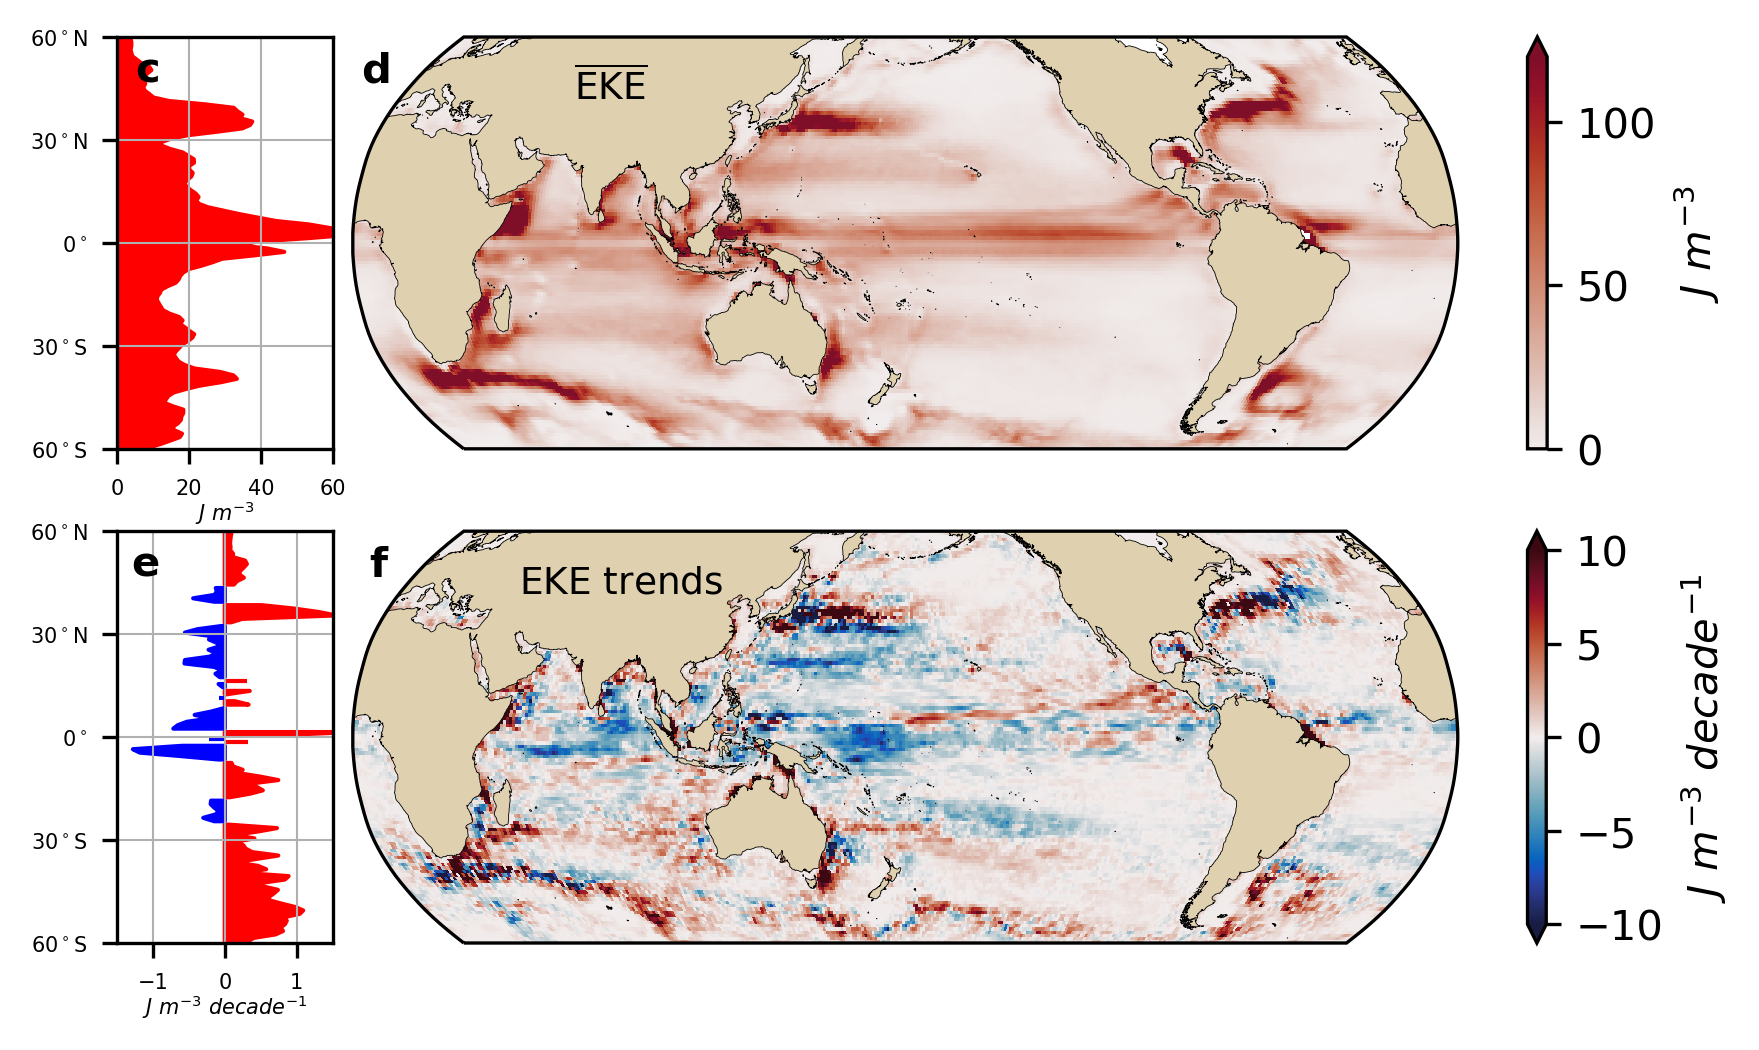

In [16]:
fig = plt.figure(dpi=300)

ax1 = fig.add_subplot(2, 1, 1, projection = ccrs.Robinson(central_longitude=180))

im = mean_EKE.plot(ax=ax1, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = truncate_colormap(cm.cm.amp, 0, 0.8), vmin = 0, vmax = 120)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land)
add_patches(ax1)

cb = plt.colorbar(im, orientation="vertical",extend='max')
cb.set_label(label="$J\ m^{-3}$")

ax_w1 = plt.axes([0, 0.537, 0.12, 0.343])

zonal_sum_tke=(mean_EKE.T).mean('lon')
zonal_sum_tke=zonal_sum_tke

pos=np.ma.masked_where(zonal_sum_tke<0, zonal_sum_tke)
ax_w1.fill_betweenx(zonal_sum_tke.lat, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_tke>0, zonal_sum_tke)

ax_w1.fill_betweenx(zonal_sum_tke.lat, neg, neg*0, color='b')

ax_w1.set_ylim(-60,60)
ax_w1.set_xlim(0,60)
ax_w1.set_xlabel("$J\ m^{-3}$",fontsize=5)
ax_w1.xaxis.set_label_coords(0.5, -0.12)
ax_w1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w1.tick_params(axis='both', which='major', labelsize=5)
ax_w1.set_yticks(range(-60,61,30))
ax_w1.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w1.grid(linewidth=0.5)
ax_w1.text(5,47,'c',fontweight='bold')
ax_w1.text(68,47,'d',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax2 = fig.add_subplot(2, 1, 2, projection = ccrs.Robinson(central_longitude=180))

im = trends.plot(transform=ccrs.PlateCarree(), add_colorbar=False,
              cmap=cm.cm.balance, vmin=-10, vmax=10,ax=ax2)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land)
add_patches(ax2)

cb = plt.colorbar(im, orientation="vertical",extend='both')
cb.set_label(label="$J\ m^{-3}\ decade^{-1}$")


ax_w2 = plt.axes([0.0, 0.125, 0.12, 0.343])

increase_tke_gw=(trends.mean('lon'))

pos=np.ma.masked_where(increase_tke_gw<0, increase_tke_gw)
ax_w2.fill_betweenx(trends.lat, pos*0 , pos, color='r')

neg=np.ma.masked_where(increase_tke_gw>0, increase_tke_gw)

ax_w2.fill_betweenx(trends.lat, neg, neg*0, color='b')

ax_w2.set_ylim(-60,60)
ax_w2.set_xlim(-1.5,1.5)
ax_w2.set_xlabel("$J\ m^{-3}\ decade^{-1}$",fontsize=5)
ax_w2.xaxis.set_label_coords(0.5, -0.12)
ax_w2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w2.tick_params(axis='both', which='major', labelsize=5)
ax_w2.set_yticks(range(-60,61,30))
ax_w2.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w2.grid(linewidth=0.5)
ax_w2.text(-1.3,47,'e',fontweight='bold')
ax_w2.text(2,47,'f',fontweight='bold')

ax1.text(0.20,0.85,r'$\overline{\mathrm{EKE}}$',fontsize=9,transform=ax1.transAxes);
ax2.text(0.15,0.85,r'$\mathrm{EKE}$ trends',fontsize=9,transform=ax2.transAxes);

**Figure 1 Sea Surface Height trend, mean surface Eddy Kinetic Energy and surface Eddy Kinetic Energy trend between 1993-2019.** (c) zonally averaged mean EKE; (d) map of mean EKE; (e) zonally averaged EKE trend; (f) map of EKE trend (55.4% of global area is significant above 95% confidence level). In panel (d), solid contours show positive EKE trends and dashed contours show negative EKE trends (contours of ±5 J m−3 decade−1).

*Note: Figure 1 a & b corresponds to the SSH trends from AVISO+ (See Methods).*